# Correlaci√≥n cruzada

La correlaci√≥n cruzada es una operaci√≥n muy similar a la convoluci√≥n que nos permite medir el grado de similitud de 2 se√±ales en el instante $t_0$ pero tambi√©n con diferentes desplazamientos entre las se√±ales analizadas (retardos y adelantos).

La <b>correlaci√≥n cruzada</b> se define como:

$r_{xy}[l]=\sum\limits_{n=-\infty}^{\infty}x[n]y[n-l], ~~~~~~l=0, \pm1, \pm2, ...$

* $l$ es el par√°metro de desplazamiento (retardo o adelanto de la se√±al).
* El sub√≠ndice $xy$ indica las secuencias que se van a correlar y su orden indica la direcci√≥n en que se desplaza una respecto a la otra.


Analizando la forma de calcular la correlaci√≥n cruzada podemos ver que es muy similar a la convoluci√≥n. Si vemos las operaciones en detalle nos daremos cuenta que la correlaci√≥n cruzada prescinde de la operaci√≥n de reflejar la secuencia pero el resto de las operaciones coinciden. 

Convoluci√≥n vs Correlaci√≥n
* ~~Una secuencia se refleja~~
* La secuencia se desplaza
* Se multiplican las secuencias y se obtiene la secuencia producto
* Se suman los valores de la secuencia producto 


Esta similitud nos puede facilitar la implementaci√≥n de la correlaci√≥n cruzada, ya que podemos emplear el algoritmo de convoluci√≥n reflejando la se√±al antes de pasarla como argumento a la funci√≥n

* resultado de la convolucion= <code>convolve(x[n],h[n])</code>
* resultado de la correlaci√≥n cruzada= <code>convolve(x[n],h[-n])</code>




In [1]:
#librerias necesarias para la pr√°ctica
%matplotlib inline 

import matplotlib.pyplot as plt
import numpy as np
import IPython
from scipy import signal
from scipy.io import wavfile
import seaborn as sns
plt.rcParams["figure.figsize"] = (14,4) #dimensiones por defecto al plotear (width, height)

## Visualizaci√≥n 

Un gr√°fico t√≠pico que nos encontraremos en la teor√≠a y en los libros es el de "piruleta" o stem (barras con un c√≠rculo encima). Este tipo de gr√°ficos se pueden realizar facilmente con matplotlib.  Voy a dejar una funci√≥n ya configurada que podeis modificar a vuestro gusto.

In [2]:
#Este es un m√©todo de visualizaci√≥n muy b√°sico para hacer pruebas
def plot_stem( t , y, y_lim=None, view_baseline=True, title=None):
    """Funci√≥n que configura y visualiza un gr√°fico stem 

       Par√°metros:
       t -- muestras de tiempo
       y -- secuencia para visualizar
       y_lim -- tupla de la forma (min, max) que establece los l√≠mites en el eje de ordenadas. Por defecto None
       view_baseline -- Establece una l√≠nea horizontal en el eje de las x a la altura de  y=0 . Por defecto False

    """
    markerline, stemlines, baseline = plt.stem(t, y)
    plt.setp(baseline, visible=view_baseline)
    plt.setp(markerline, color="crimson",markersize = 10)
    plt.setp(stemlines, color="crimson", linewidth = 4)
    if 0 in t:
        plt.axvline(x=0, linewidth=1,color="black")
    
    plt.ylim(y_lim)
    if title is not None:
        plt.title(title)
    plt.show()


### correlation_lags

scipy tiene un m√©todo para gestionar los √≠ndices de la correlaci√≥n PERO aparece a partir de  la versi√≥n 1.6. 
En caso de que no teng√°is esa versi√≥n y no pod√°is actualizar, pod√©is usar este m√©todo

In [3]:
def own_correlation_lags(in1_len, in2_len):
    '''
    Calcula el array de √≠ndices que representan los lags o desplazamientos para la correlaci√≥n 1-D
    
    Par√°metros
    in1_len: longitud de la primera se√±al en la operaci√≥n de correlaci√≥n
    in2_len: longitud de la segunda se√±al en la operaci√≥n de correlaci√≥n
    Return
    array de √≠ndices que representan los lags
    '''
    return np.arange(-in2_len + 1, in1_len)

## Ejemplo de correlaci√≥n cruzada
La funci√≥n de correlaci√≥n cruzada la podeis obtener de la implementaci√≥n de la convoluci√≥n que hicisteis en la pr√°ctica anterior,  reflejando la se√±al, tal y como se explic√≥ anteriormente pero, adem√°s, la podeis encontrar en diferentes paquetes como, por ejemplo, *numpy.correlate* o  *scipy.signal.correlate* (aunque la funci√≥n de scipy realmente emplea numpy por debajo).



<b>Ejemplo</b>: Correlaci√≥n cruzada entre una se√±al con ruido y la se√±al original

Vamos a ver un ejemplo muy sencillo en el que "enviamos" una se√±al a trav√©s de un canal y la recibimos con ruido (vamos, por ahora,  a obviar el retardo y la atenuaci√≥n que tendr√≠a dicha se√±al)

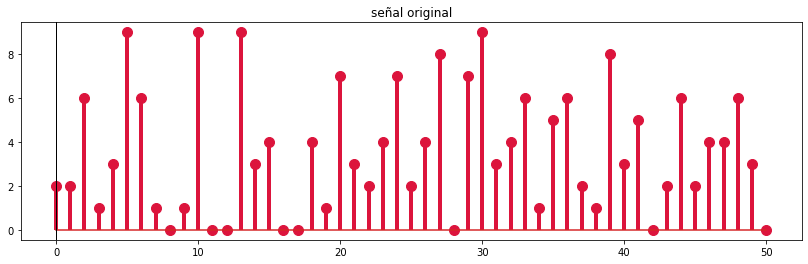

In [4]:
##Creamos la se√±al
np.random.seed(123)#semilla para repetir los n√∫meros aleatorios
signal_size=50
x=np.arange(signal_size+1)
sig=np.random.randint(10, size=len(x))
plot_stem(x,sig, title="se√±al original", view_baseline=True)



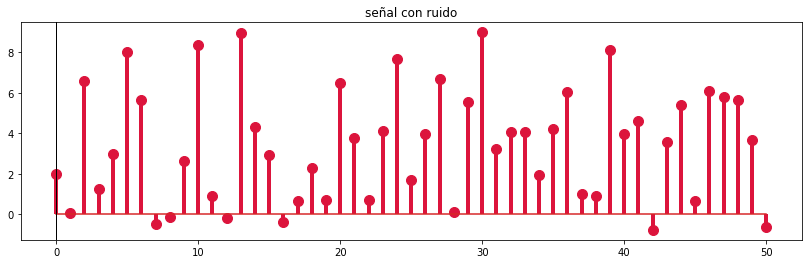

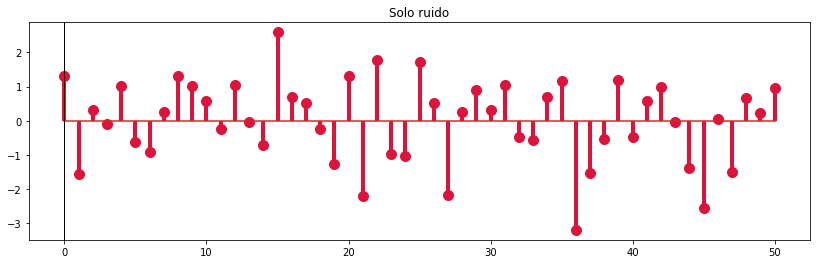

In [5]:
## Simulamos que mandamos la se√±al y la recibimos con ruido (sin retardo)
sig_noise = sig + np.random.randn(len(sig))
##creamos una se√±al solo con ruido para ver las diferencias
only_noise=np.random.randn(len(sig))#ruido uniformemente distribuido  media 0 sigma 1
plot_stem(x,sig_noise, title="se√±al con ruido", view_baseline=True)
plot_stem(x,only_noise, title="Solo ruido", view_baseline=True)


Se puede observar que la se√±al con ruido y el ruido solo no tienen porque ser tan f√°ciles de distinguir a simple vista. El uso de la correlaci√≥n cruzada nos puede ayudar a encontrar la se√±al

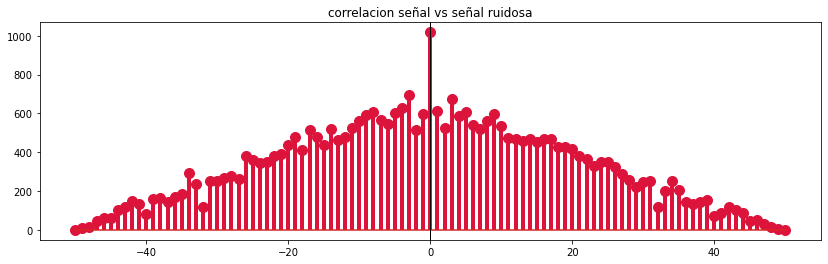

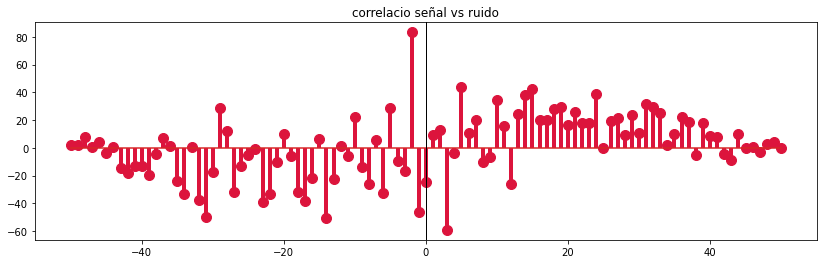

In [6]:
##Obtenemos la correlaci√≥n
corr = signal.correlate(sig, sig_noise)#obtenemos la correlaci√≥n
#corr /= np.max(corr) #normalizamos los valores
lags = signal.correlation_lags(len(sig), len(sig_noise))#calcula los √≠ndices de la correlaci√≥n cruzada 1-D entre dos se√±ales
#lags = own_correlation_lags(len(sig), len(sig_noise))#calcula los √≠ndices de la correlaci√≥n cruzada 1-D entre dos se√±ales

##Repetimos lo mismo con la se√±al que es solo ruido
corr2 = signal.correlate(sig, only_noise)#obtenemos la correlaci√≥n
#corr2 /= np.max(corr2) #normalizamos los valores
lags2 = signal.correlation_lags(len(sig), len(only_noise))#calcula los √≠ndices de la correlaci√≥n cruzada 1-D entre dos se√±ales
#lags2 = own_correlation_lags(len(sig), len(only_noise))#calcula los √≠ndices de la correlaci√≥n cruzada 1-D entre dos se√±ales



plot_stem(lags,corr, title="correlacion se√±al vs se√±al ruidosa", view_baseline=True)
plot_stem(lags2,corr2, title="correlacio se√±al vs ruido", view_baseline=True)


## Autocorrelaci√≥n 

* La <b>autocorrelaci√≥n</b> es la correlaci√≥n cruzada de una se√±al consigo misma (desplazada)

* Es √∫til, por ejemplo para encontrar patrones repetitivos de una se√±al enmascarada bajo el ruido

* La autocorrelaci√≥n se define como:
    
    $r_{xx}[l]=\sum\limits_{n=-\infty}^{\infty}x[n]y[n-l], ~~~~~~l=0, \pm1, \pm2, ...$
    
    
Fij√°ndonos en la f√≥rmula podemos ver que la autocorrelaci√≥n en $n=0$ toma el valor m√°ximo y representa la energ√≠a de la se√±al 
    
   
### Ejemplo de autocorrelaci√≥n
   
Creamos una se√±al aleatorio y la repetimos para generar una se√±al peri√≥dica. Al resultado le a√±adimos ruido para representar una se√±al real

In [7]:
##autocorrelaci√≥n

periodo=np.random.randint(15,20)#el tama√±o del per√≠odo es aleatorio
sig_auto=[ np.random.randint(10) for i in range(periodo)]*10 #
sig_auto_noise=sig_auto+ np.random.randn(len(sig_auto))

Es importante destacar que no siempre es f√°cil ver la periocidad de la se√±al gr√°ficamente. Vamos a dibujar la se√±al crear para ejemplificar esto √∫ltimo. <b>¬øPuedes ver a simple vista el periodo?</b>

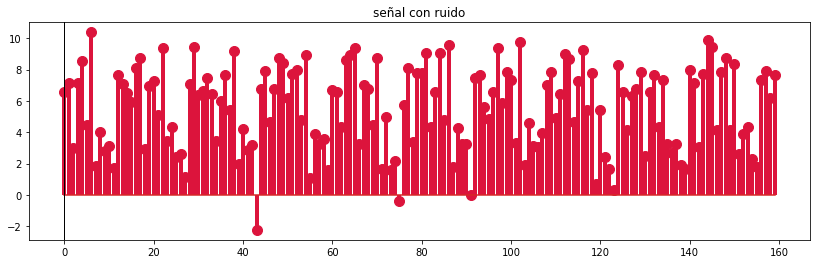

In [8]:
plot_stem(range(len(sig_auto_noise)),sig_auto_noise, title="se√±al con ruido")

Vamos a calcular la correlaci√≥n y comprobar si los resultados coinciden con el valor de la variable *periodo*

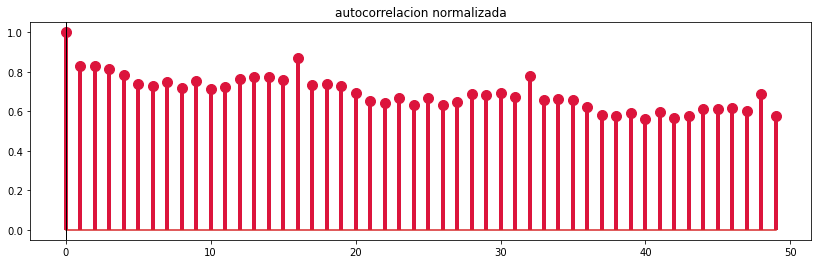

El per√≠odo empleada es 16. ¬øPuedes ver ese per√≠odo en la gr√°fica?


In [9]:
corr = signal.correlate(sig_auto_noise, sig_auto_noise)#obtenemos la autocorrelaci√≥n
corr /= np.max(corr) #normalizamos los valores
lags = signal.correlation_lags(len(sig_auto_noise), len(sig_auto_noise))#calcula los √≠ndices de la correlaci√≥n cruzada 1-D entre dos se√±ales

#voy a mostrar solo los 50 √≠ndices positivos primeros para que la gr√°fica sea m√°s clara
plot_stem(lags[list(lags).index(0):list(lags).index(0)+50],corr[list(lags).index(0):list(lags).index(0)+50], title="autocorrelacion normalizada")
print("El per√≠odo empleada es {0}. ¬øPuedes ver ese per√≠odo en la gr√°fica?".format(periodo))

 
    


## Ejercicios

<span style='background:yellow' ><b>Ejercicio</b></span>

Tal y como se comentaba anteriormente, el algoritmo de la correlaci√≥n cruzada es muy parecido al de la convoluci√≥n. Para comprobarlo teneis que  emplear el algoritmo que implementamos en la pr√°ctica anterior para la convoluci√≥n y adaptarlo levemente para que pueda ser empleado en la correlaci√≥n cruzada


In [10]:
##Os dejo mi implementaci√≥n de la convoluci√≥n pero aqu√≠ ir√≠a la vuestra
def op_convolucion(x,h):
     
     elementos_x=len(x)
     elementos_h=len(h)   
     elementos_conv=elementos_x+elementos_h-1#el n√∫mero de valores de la convoluci√≥n
             
     #creo la matriz x con tantas filas como elementos de la convoluci√≥n y tantas columnas como elementos de h   
     mat_x=np.mat(np.array([np.concatenate(([0]*i, x,[0]*(elementos_conv-(elementos_x+i)) ))for i in range(elementos_h)])).transpose()
    
     #creo la matriz h
     mat_h=np.mat(np.array(h)).transpose()
     #multiplico las matrices y lo convierto en lista para devolverlo
     return (mat_x*mat_h).transpose().tolist()[0]


def mi_convolucion(x,ind_x, h, ind_h):
    muestras=np.arange(ind_x[0]+ind_h[0], ind_x[1]+ind_h[1]+1)#Gestiono los √≠ndices reales de la convoluci√≥n
    sum_conv= op_convolucion(x,h)#Llamo a la operaci√≥n de convoluci√≥n
    return muestras, sum_conv
    
    

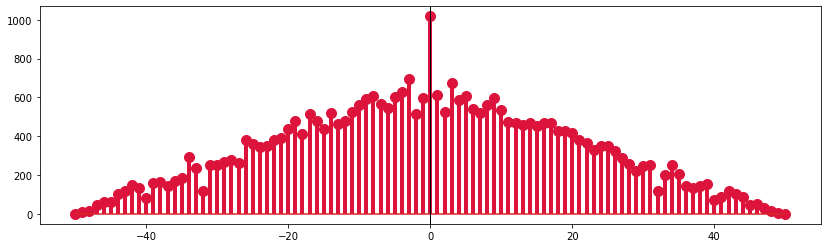

In [11]:
#Ajusto los √≠ndices para que se visualice como en la operaci√≥n de correlaci√≥n
#y demostrar que obtenemos lo mismo
muestras, corr = mi_convolucion(sig,(-signal_size//2,signal_size//2),sig_noise[::-1],(-signal_size//2,signal_size//2) )#obtenemos la correlaci√≥n
plot_stem(muestras,corr)  
   


<span style='background:yellow' ><b>Ejercicio</b></span>

<b>Estimaci√≥n del tiempo de retardo en las se√±ales de radar</b>

Vamos a simular que mandamos una se√±al de radar y que recibimos una respuesta. Recordamos que, si existe un blanco, la se√±al recibida estar√° formada por una versi√≥n retrasada de la se√±al transmitida, reflejada desde el blanco, y distorsionada por efecto del ruido aditivo.

$y[n]=ax[n-D] + v[n]$

Si no existe blanco la se√±al ser√° solo ruido.

Teniendo 2 se√±ales,  el problema de la detecci√≥n del radar consiste en comparar $x[n]$ e $y[n]$ para saber si existe blanco y en caso afirmativo determinar el tiempo de retardo para saber la distancia al blanco

En este ejercicio vamos a emitir una <b>secuencia de Barker</b> de 13-puntos

$x[n]=\{+1,+1,+1,+1,+1,-1,-1,+1,+1,-1,+1,-1,+1\}$


Las secuencias o c√≥digos Barker del tipo binario est√°n compuestas por una sucesi√≥n de ‚Äì1‚Äôs y +1‚Äôs de una longitud finita, tal que <b>su funci√≥n de autocorrelaci√≥n cumple que $r_{xx}[l] =< 1 $ para todo $l\ne 0$ </b>


El ruido ($v[n]$) estar√° formado por una secuencia aleatoria gaussiana con media igual a cero y $\sigma^2=0.01$

 
<code>sigma * np.random.randn(...) + mu</code>

o

<code>np.random.normal(mu,sigma, size)</code>


La atenuaci√≥n ser√° de 0.9 y el retardo de 20

1. Crea una secuencia Barker de 13 puntos. Calcula y visualiza  su autocorrelaci√≥n para comprobar sus propiedades
2. Crea el c√≥digo necesario para simular la emisi√≥n/recepci√≥n de una secuencia arbitraria en un radar. Necesitareis una funci√≥n *transmision* que convierta la se√±al emitida en $y[n]$
    * <code>def transmision(signal, mu_ruido=0, varianza=0.01, atenuacion=0.9, retardo=20, target=True):</code>
    * Si *target*=True, entonces la se√±al original viene de vuelta tras encontrar un blanco (con ruido, atenuada y retrasada), en caso contrario recibiremos solo ruido.
    * *retardo*: identifica el desplazamiento entre la se√±al enviada y la recuperada. Ej. si definimos un retardo de 20 muestras, la se√±al emitida tardar√° 20 muestras en recuperarse po lo que  las primeras 20 muestras de $y$ ser√°n ruido y a continuaci√≥n vendr√° la se√±al reflejada
    * La funci√≥n devolver√° tantas muestras como se han enviado. Ej. con retardo 3 y SIN ruido NI atenuaci√≥n
        * x[n]=\{+1,+1,+1,+1,+1,-1,-1,+1,+1,-1,+1,-1,+1\,0,0,0,0,0}
        * y[n]=\{0,0,0,+1,+1,+1,+1,+1,-1,-1,+1,+1,-1,+1,-1,+1\,0,0}
    
3. Crea una secuencia $x$ para enviar basada en la secuencia de Barker en el rango $0<=n<=100$
    * Cubrireis con ceros la parte de $x[n]$ no incluida en la secuencia de barker
4. *Emite* la secuencia creada a trav√©s de la funci√≥n desarrollada en el apartado anterior y recupera una se√±al $y$ en el rango $0<=n<=100$
5. Dibuja en un mismo gr√°fico la se√±al enviada y la reflejada cuando se encuentra un blanco
    * Para visualizar pod√©is emplear *seaborn* que es una librer√≠a m√°s sencilla de utilizar que matplotlib y con muchas opciones gr√°ficas (consultar api en seaborn.pydata.org/). Para mostrar 2 se√±ales en la misma gr√°fica podeis usar este c√≥digo
     ```python 
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax=sns.lineplot(x=range(len(x)), y=x, ax=ax)
sns.lineplot(x=range(len(x)), y=rdo, ax=ax)
plt.show()
    ```
    
4. Calcula y dibuja la correlaci√≥n cruzada $r_{xy}[l]$
    * ¬øPuedes encontrar facilmente el retardo en la gr√°fica?
    * Compara con el caso de que el radar no encuentre blanco y obtenga solo ruido

 
5. Repite los ejercicios para $\sigma^2=0.1$ y  $\sigma^2=1$
    * ¬øQu√© ocurre?
    

    

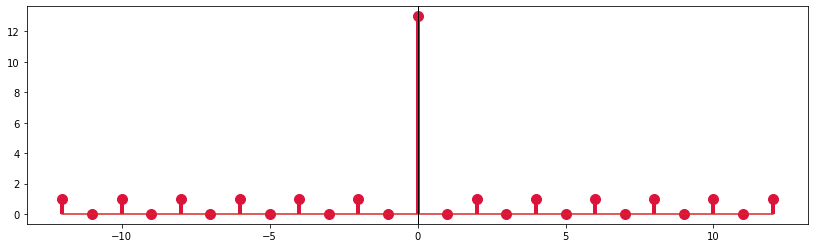

la se√±al est√° definida entre 0 y 13
la correlaci√≥n queda definida entre -12 y 12


In [12]:
#ej1
    
#Creo la secuencia de barker
barker = [1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1]
x = barker.copy()

#calculo la autocorrelacion para la secuencia barker
correlacion = np.correlate(x, x, mode='full')
indices_correlacion = own_correlation_lags(len(x), len(x))

#Visualizo la autocorrelacion para la secuencia barker
plot_stem(indices_correlacion, correlacion)

print("la se√±al est√° definida entre {} y {}".format(0, len(x)))
print("la correlaci√≥n queda definida entre {} y {}".format(indices_correlacion[0], indices_correlacion[-1]))


In [13]:
#ej2

#Codigo para transmitir y una funci√≥n para extender con ceros cualquier se√±al arbitraria
def transmision(signal, mu_ruido=0, varianza=0.01, atenuacion=0.9, retardo=20, target=True):
    # retardar
    if retardo > 0:
        rsignal = [0]*retardo + signal
    else:
        rsignal = signal.copy()
    # ruido
    ruido = np.random.normal(mu_ruido, np.sqrt(varianza), len(rsignal))
    if target:
        # transmitir
        nsignal = [rsignal[i]*atenuacion+ruido[i] for i in range(len(rsignal))]
    else:
        # transmitir s√≥lo ruido
        nsignal = [ruido[i] for i in range(len(rsignal))]
    return nsignal[:len(signal)]

#Pod√©is crear una funci√≥n que extienda una funci√≥n hasta un n√∫mero de muestras con ceros por comodidad
#def extend_signal_zeros(signal, n):
#    pass

x = [1,1,1,1,1,-1,-1,1,1,-1,1,-1,1,0,0,0,0,0]
y = transmision(x, 0, 0, 1.0, 3)
print("x[n] = {}".format(x))
print("y[n] = {}".format(y))


x[n] = [1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 0, 0, 0, 0, 0]
y[n] = [0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 0.0, 0.0]


In [14]:
##Ej3. Emision de la se√±al
#extiendo una secuencia Barker

#Creo la secuencia de barker
barker = [1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1]

# extender
size_signal = 100
emit_signal = list(np.concatenate((barker, np.zeros(size_signal - len(barker)))))

#size_signal=100
#emit_signal=extend_signal_zeros(x,size_signal)

# Ej4.

#Emito la se√±al y encuentro un target
rdo_target = transmision(emit_signal)
#rdo_target=transmision(emit_signal, varianza=0.1)
#rdo_target=transmision(emit_signal, varianza=1)

#Emito la se√±al y NO encuentro un target
rdo_noise=transmision(emit_signal, target=False)
#rdo_noise=transmision(emit_signal, varianza=0.1,target=False)
#rdo_noise=transmision(emit_signal, varianza=1,target=False)


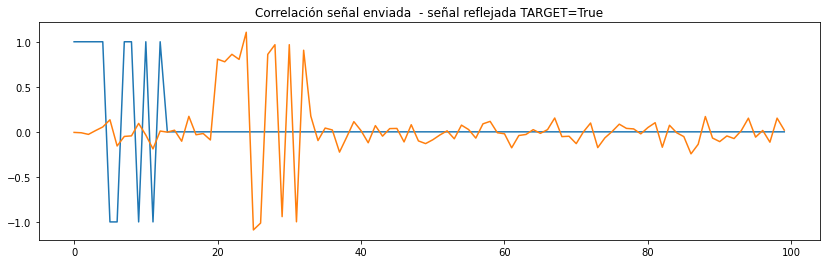

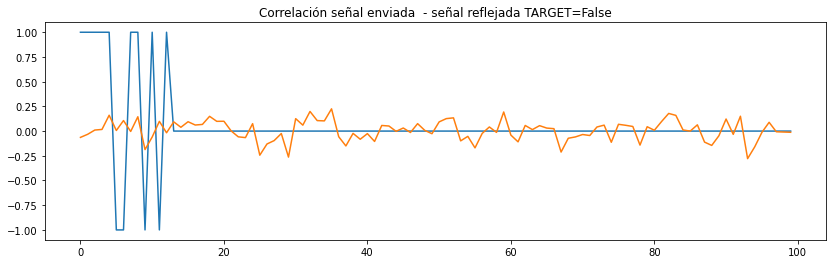

In [15]:
#Ej5. Dibujo en un gr√°fico la secuencia enviada y la reflejada con seaborn
f, ax = plt.subplots()
ax=sns.lineplot(x=range(len(emit_signal)), y=emit_signal, ax=ax)
sns.lineplot(x=range(len(emit_signal)), y=rdo_target, ax=ax)
plt.title("Correlaci√≥n se√±al enviada  - se√±al reflejada TARGET=True")
plt.show()

f, ax = plt.subplots()
ax=sns.lineplot(x=range(len(emit_signal)), y=emit_signal, ax=ax)
sns.lineplot(x=range(len(emit_signal)), y=rdo_noise, ax=ax)
plt.title("Correlaci√≥n se√±al enviada  - se√±al reflejada TARGET=False")
plt.show()

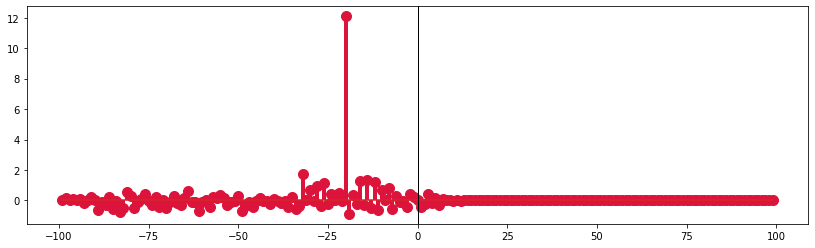

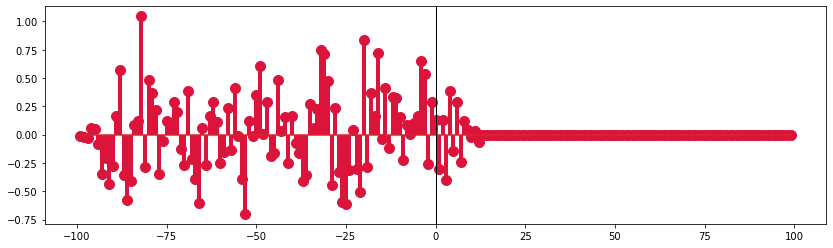

In [16]:
#Ej6.

#Calculo la correlaci√≥n cruzada entre la se√±al emitida y la recibida con TARGET

correlacion1 = np.correlate(emit_signal, rdo_target, mode='full')
indices_correlacion1 = own_correlation_lags(len(emit_signal), len(rdo_target))

#Visualizo la se√±al
plot_stem(indices_correlacion1, correlacion1)

#Ej7.

#Calculo la correlaci√≥n cruzada entre la se√±al emitida y la recibida con RUIDO

correlacion2 = np.correlate(emit_signal, rdo_noise, mode='full')
indices_correlacion2 = own_correlation_lags(len(emit_signal), len(rdo_noise))

#Visualizo la se√±al
plot_stem(indices_correlacion2, correlacion2)



<span style='background:yellow' ><b>Ejercicio</b></span>

Desarrolla las siguientes secuencias y calcula y visualiza las siguientes correlaciones: $r_{xx}[l]$ y $r_{xy}[l]$ 


 $x[n] = \left \{ \begin{matrix} 1, & n_0-N<=n<=n_0+N
\\ 0 & en~otro~caso\end{matrix}\right.$ 



 $y[n] = \left \{ \begin{matrix} 1, & -N<=n<=N
\\ 0 & en~otro~caso\end{matrix}\right.$ 




<b>Nota</b> En este tipo de ejercicios **la idea es crear las funciones parametrizadas** que permitan hacer estos c√°lculos variando los argumentos. Para comparar podeis tomar $N=10$ y representar una se√±al entre $-30<=n<=30$. 

<b>Nota 2</b>: Para hacerlo m√°s general podemos poner $n_0$ como un par√°metro de la funci√≥n. Para comparar tomaremos  $n_0$ como la primera muestra temporal de la secuencia de x[n] (ej. -30)


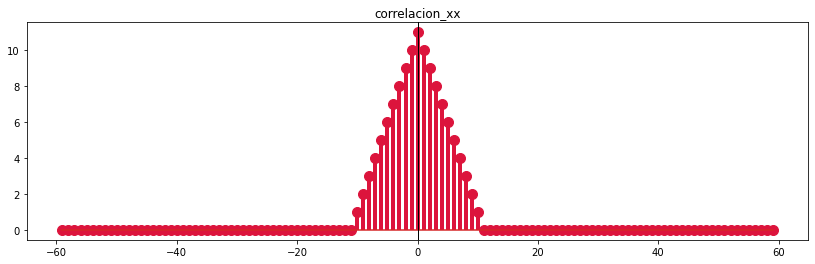

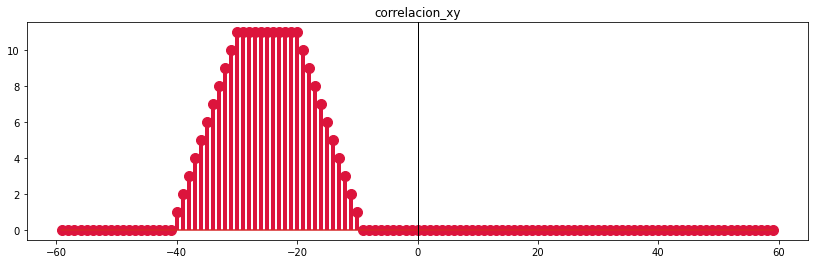

In [17]:
def createx(muestras, N=10, n0=0):
    return [1 if n0-N <= i <= n0+N else 0 for i in muestras]

def createy(muestras, N=10):       
    return [1 if -N <= i <= N else 0 for i in muestras]

muestras = np.arange(-30,30)
x = createx(muestras, 10, -30)
y = createx(muestras, 10)

#Crea y visualiza las correlaciones

correlacion_xx = np.correlate(x, x, mode='full')
indices_correlacion_xx = own_correlation_lags(len(x), len(x))
plot_stem(indices_correlacion_xx, correlacion_xx, title="correlacion_xx")

correlacion_xy = np.correlate(x, y, mode='full')
indices_correlacion_xy = own_correlation_lags(len(x), len(y))
plot_stem(indices_correlacion_xy, correlacion_xy, title="correlacion_xy")



<span style='background:yellow' ><b>Ejercicio</b></span>
Calcula la autocorrelaci√≥n para las siguientes se√±ales 

* $x[n]=\{\underrightarrow{1},2,1,1\}$
* $x1[n]=\{\underrightarrow{1},1,2,1\}$


* ¬øQu√© puedes concluir?



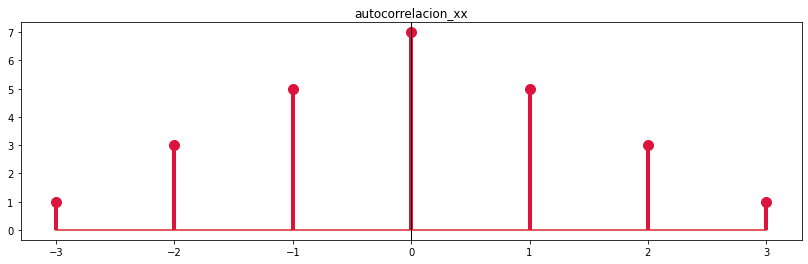

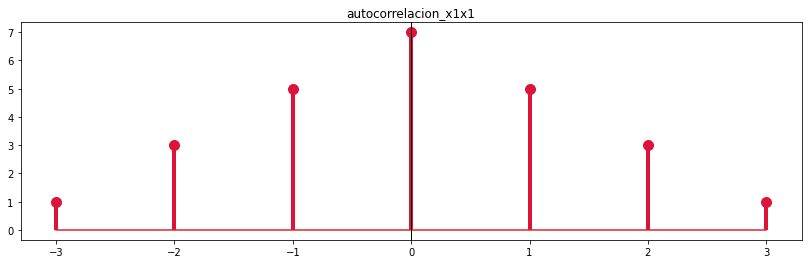

la autocorrelaci√≥n de una se√±al es id√©ntica a la de su se√±al reflejada!


In [18]:
x = [1,2,1,1]
x1 = x[::-1]

correlacion_xx = np.correlate(x, x, mode='full')
indices_correlacion_xx = own_correlation_lags(len(x), len(x))
plot_stem(indices_correlacion_xx, correlacion_xx, title="autocorrelacion_xx")

correlacion_x1x1 = np.correlate(x1, x1, mode='full')
indices_correlacion_x1x1 = own_correlation_lags(len(x1), len(x1))
plot_stem(indices_correlacion_x1x1, correlacion_x1x1, title="autocorrelacion_x1x1")

print("la autocorrelaci√≥n de una se√±al es id√©ntica a la de su se√±al reflejada!")

<span style='background:yellow' ><b>Ejercicio</b></span>

Una se√±al de audio $s(t)$ generada por un altavoz se refleja en dos paredes diferentes con coeficientes de reflexi√≥n $r_1$ y $r_2$. La se√±al registrada por un micr√≥fono pr√≥ximo al altavoz, despu√©s del muestreo, es: 

$y[n]= s[n]+r_1s[n‚àík_1]+r_2s[n‚àík_2]$ .

donde $s[n]$ es la se√±al original muestreada,  k1 y k2 son los retardos de los dos ecos y $r_1$ y $r_2$ los coeficientes de reflexi√≥n

* Implementar las funciones necesarias para crear el escenario descrito
    * Podeis usar el *mensaje.wav* de la primera pr√°ctica
    * Se necesitar√° una funci√≥n para crear ecos
    <code>
        def eco(signal, r, k):
    </code>
    * Se necesitar√° una funci√≥n que simule el resultado de transmitir el audio, Esta funci√≥n recibir√° como argumento la se√±al original y con ella crear√° los 2 ecos y devolver√° la suma las tres se√±ales

* Determinar la correlaci√≥n $r_{sy}$
    * Aplicad un resample de la se√±al para poder "ver" algo en la gr√°fica
    <code>
    muestreado=signal[0:len(signal):500]
    </code>
  
    * Analizar la correlaci√≥n ¬øSe puede sacar informaci√≥n sobre $r_1$, $r_2$, $k_1$ y $k_2$ observando la gr√°fica?
   

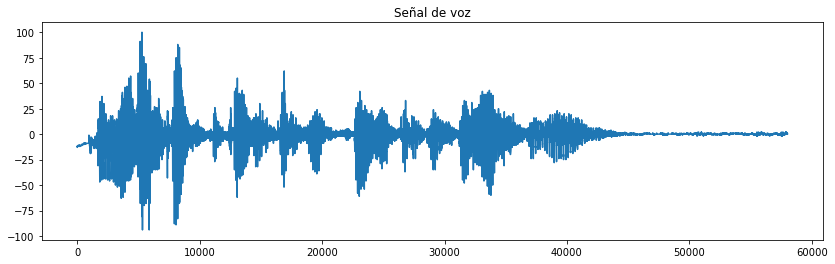

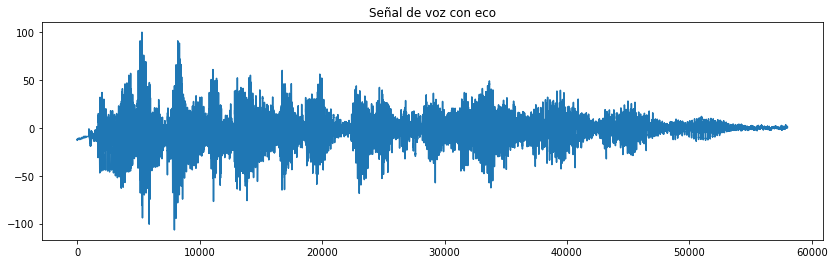

In [19]:

def eco(signal, r, k):
    # r es el coeficiente de reflexi√≥n, <1.0
    # k es el retraso
    s0 = [0]*int(k) + signal
    s1 = [r*i for i in s0]
    return s1[:len(signal)]

def transmision(signal, r1, r2, k1, k2):
    e1 = eco(signal, r1, k1)
    e2 = eco(signal, r2, k2)
    return [signal[i] + e1[i] + e2[i] for i in range(len(signal))]

#Cargamos un mensaje de voz
rate, s = wavfile.read('mensaje.wav') #Return the sample rate (in samples/sec) and data from an LPCM WAV file
# Rescalado simple de la se√±al,
norm = 1.0 / max(np.absolute([min(s), max(s)]))
analogica = 100.0 * s * norm
#discretizaci√≥n de los valores para la se√±al digital
digital = list(np.round(analogica))

#argumentos
r1 = 0.6
r2 = 0.5
k1 = int(len(digital)*0.1) #defino el retardo a trav√©s de un porcentaje
k2 = int(len(digital)*0.2) #defino el retardo a trav√©s de un porcentaje

plt.plot(digital);
plt.title("Se√±al de voz")
plt.show()

rdo_eco = transmision(digital, r1=r1, r2=r2, k1=k1, k2=k2)

plt.plot(rdo_eco);
plt.title("Se√±al de voz con eco")
plt.show()



In [20]:
IPython.display.Audio(digital, rate=rate)


In [21]:
IPython.display.Audio(rdo_eco, rate=rate)


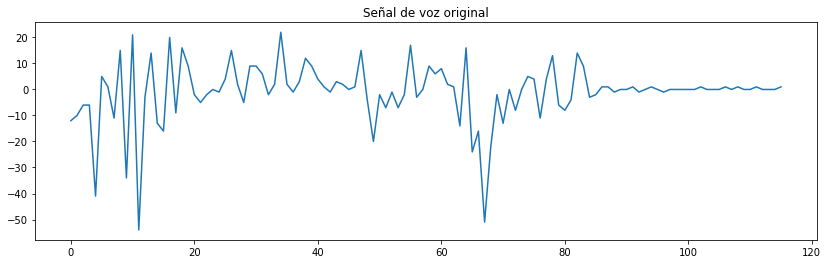

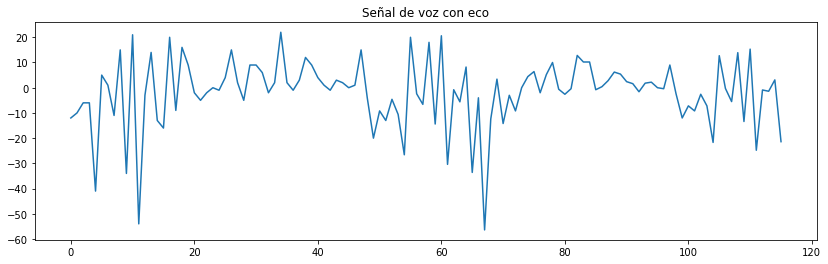

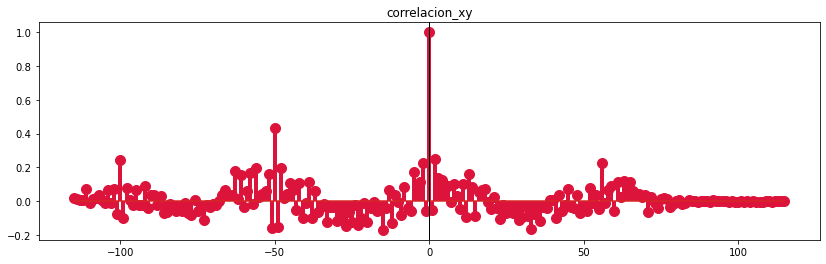

an√°lisis:
- es la misma se√±al
- hay un retraso de unas 50 muestras (k1)
- hay otro retraso de unas 100 muestras (k2)


In [22]:
#argumentos
muestreado_digital = digital[0:len(digital):500]#hago un resample para poder visualizar mejor los datos
k1 = 50
k2 = 100
rdo_eco_muestreado_digital = transmision(muestreado_digital, r1=r1, r2=r2, k1=k1, k2=k2)

plt.plot(muestreado_digital);
plt.title("Se√±al de voz original")
plt.show()

plt.plot(rdo_eco_muestreado_digital);
plt.title("Se√±al de voz con eco")
plt.show()

#Calcula y analiza la correlaci√≥n
correlacion = np.correlate(muestreado_digital, rdo_eco_muestreado_digital, mode='full')
correlacion_normalizada = correlacion / max(correlacion)
indices_correlacion = own_correlation_lags(len(muestreado_digital), len(rdo_eco_muestreado_digital))
plot_stem(indices_correlacion, correlacion_normalizada, title="correlacion_xy")

print("an√°lisis:")
print("- es la misma se√±al")
print("- hay un retraso de unas 50 muestras (k1)")
print("- hay otro retraso de unas 100 muestras (k2)")

## Sistemas descritos mediante ecuaciones en diferencias con coeficientes constantes

El comportamiento de muchos sistemas f√≠sicos puede describirse de acuerdo a una ecuaci√≥n diferencial. Esto nos permite expresar la salida de un sistema en funci√≥n de valores pasados de la propia salida.

La relaci√≥n que existe entre la entrada y la salida de un sistema descrito por una ecuaci√≥n en diferencias lineal y con coeficientes constantes se expresa, en su forma general de la siguiente manera

$y[n]=-\sum\limits_{n=1}^{N}a_k y[n-k] +\sum\limits_{n=0}^{M} b_kx[n-k]$


La funci√≥n [signal.lfilter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html) de scipy permite implementar dichas ecuaciones. La cabecera de la funci√≥n es: *signal.lfilter(b, a, x, axis=- 1, zi=None)*
* *a* es el vector con los valores correspondientes a las constantes $a_k, k=0..N$
* *b* es el vector con los valores correspondientes a las constantes $b_k, k=0..M$
* *x* es el vector de entrada
* *zi* un vector opcional con las condiciones iniciales del sistema


Para establecer las condiciones iniciales del sistema tenemos que crear el vector $zi$. Se puede realizar "a mano", si es sencillo, o se puede emplear la funci√≥n   [signal.lfiltic](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfiltic.html#scipy.signal.lfiltic) que permite establecer condiciones iniciales m√°s complejas, incluyendo N y M entradas y salidas pasadas.

<b>Nota</b>: Si se emplea el vector *zi* La funci√≥n *lfilter* devuelve 2 resultados (2 arrays). El segundo contendr√° informaci√≥n sobre los *delays* finales del sistema. 




<span style='background:yellow' ><b>Ejercicio</b></span>

Sea un sistema descrito por la ecuaci√≥n:

$y[n]=\alpha y[n-1]+x[n]$

* Sabiendo que este sistema es LIT, calcula (**empleando ecuaciones en diferencias con coeficientes constantes**)  40 muestras de la respuesta al impulso ($x[n=\delta[n]$) para los siguientes casos:
    * $\alpha=1$ (para generar $h_1$)
    * $\alpha=0.5$ (para generar $h_2$)
    * $\alpha=1.1$ (para generar $h_2$) 
    * **Tened cuidado con los signos en los vectores** *a* y *b* de la funci√≥n 
    * Visualiza los resultados
    
    
* Supongamos ahora que la entrada es: $x[n]=e^{-0.5n}u[n]$ . 
    * Calcula las salidas para cada uno de los sistemas del apartado anterior
    * Emplead *np.exp()*


* Evalua y representa la salida del sistema para la entrada $x[n]$ imponiendo la condici√≥n inicial $y[-1]=0.5$ y asignando el valor  $\alpha=0.5$
    * Usad signal.lfiltic para crearlo




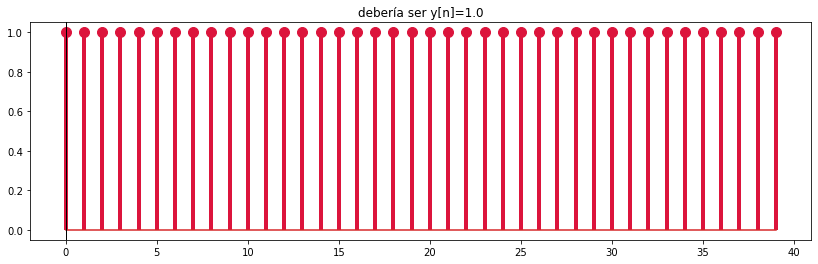

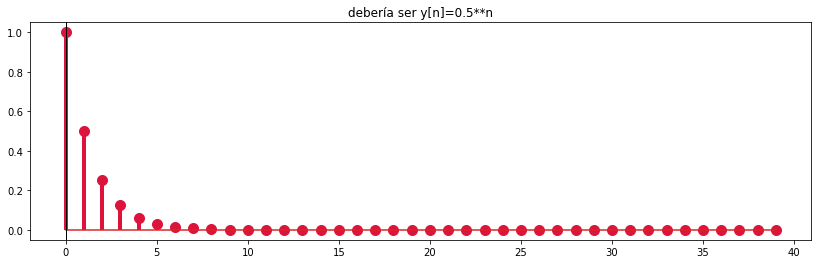

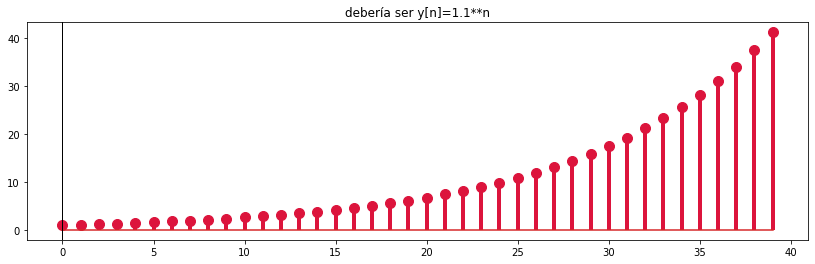

In [23]:
def create_impulso(muestras):
    return 1*(muestras==0)

muestras = np.arange(40)
#x = create_x(muestras)
impulso = create_impulso(muestras)

# calcular manualmente...

#  n | x[n] | y[n]
# -----------------
#  0 | 1    | y[0] = a*0 + x[0]
#  1 | 0    | y[1] = a*y[0] + x[1] = a*x[0] + 0 = a*x[0] = a
#  2 | 0    | y[2] = a*y[1] + x[2] = a*(a*x[0]) + 0 = a**2
# ...
# 39 | 0    | y[39] = a*y[38] + x[39] = a*(a*... x[0]) = a**39

#
# y[n] = a*y[n-1] + x[n]
#

#Crea la respuesta impulsional H1 con  signal.lfilter
# a = 1.0
# y[n] = 1.0
h1 = signal.lfilter([1], [1, -1.0], impulso)
plot_stem(muestras, h1, title="deber√≠a ser y[n]=1.0")

#Crea la respuesta impulsional H2 con  signal.lfilter 
# a = 0.5
# y[n] = 0.5**n
h2 = signal.lfilter([1], [1, -0.5], impulso)
plot_stem(muestras, h2, title="deber√≠a ser y[n]=0.5**n")

#Crea la respuesta impulsional H3 con  signal.lfilter 
# a = 1.1
# y[n] = 1.1**n
h3 = signal.lfilter([1], [1, -1.1], impulso)
plot_stem(muestras, h3, title="deber√≠a ser y[n]=1.1**n")


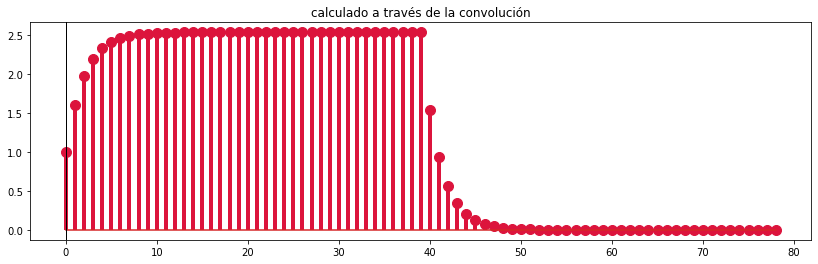

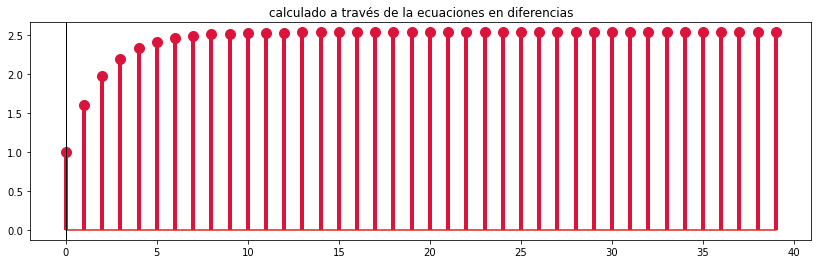

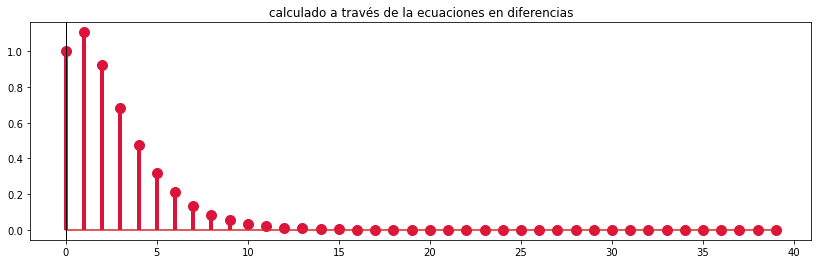

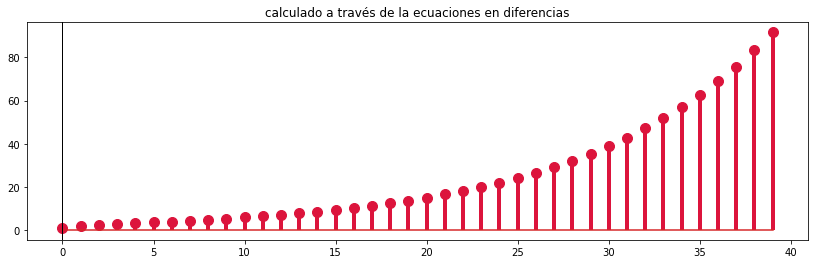

In [28]:
import math

def create_x(muestras):
    return [math.exp(-0.5*i) if i >= 0 else 0 for i in muestras]

x = create_x(muestras)

#Dada la entrada x[n], calcula las salidas para cada uno de los sistemas del apartado anterior

# h1
# posibilidad A: a trav√©s de la convoluci√≥n ahora que conocemos las h[
respuesta1a = np.convolve(x, h1)
plot_stem(range(len(respuesta1a)), respuesta1a, title="calculado a trav√©s de la convoluci√≥n")

# posibilidad B: haciendo pasar la se√±al por el circuito usando signal.lfilter()
respuesta1b = signal.lfilter([1], [1, -1.0], x)
plot_stem(muestras, respuesta1b, title="calculado a trav√©s de la ecuaciones en diferencias")

# h2
respuesta2 = signal.lfilter([1], [1, -0.5], x)
plot_stem(muestras, respuesta2, title="calculado a trav√©s de la ecuaciones en diferencias")

# h3
respuesta3 = signal.lfilter([1], [1, -1.1], x)
plot_stem(muestras, respuesta3, title="calculado a trav√©s de la ecuaciones en diferencias")


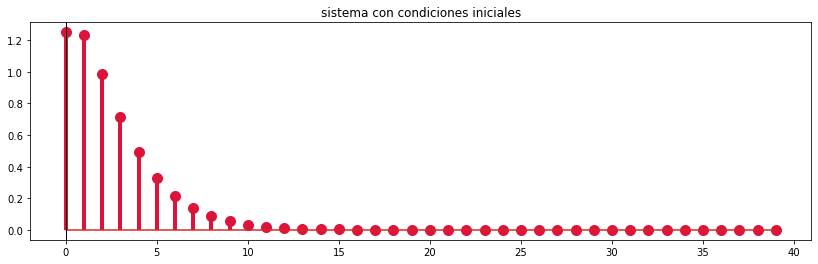

respuesta del sistema a la se√±al: [1.25000000e+00 1.23153066e+00 9.83644771e-01 7.14952546e-01
 4.92811556e-01 3.28490777e-01 2.14032457e-01 1.37213612e-01
 8.69224448e-02 5.45702189e-02 3.40230565e-02 2.10982997e-02
 1.30279020e-02 8.01739020e-03 4.92057706e-03 3.01337290e-03
 1.84214908e-03 1.12454291e-03 6.85681258e-04 4.17692459e-04
 2.54246159e-04 1.54659529e-04 9.40314653e-05 5.71458262e-05
 3.47171255e-05 2.10852159e-05 1.28029374e-05 7.77242777e-06
 4.71774260e-06 2.86321896e-06 1.73751180e-06 1.05429504e-06
 6.39682693e-07 3.88097380e-07 2.35448067e-07 1.42834025e-07
 8.66469924e-08 5.25609459e-08 3.18832694e-08 1.93399025e-08]
delays finales del sistema: [9.66995125e-09]


In [25]:

##Evalua y representa la salida del sistema para la entrada ùë•[ùëõ]  Con condiciones iniciales
#Emplead signal.lfiltic para construir zi

# condiciones iniciales
# ùë¶[-1] = 0.5
# a = 0.5

condiciones_iniciales = signal.lfiltic([1], [1, -0.5], y=[0.5])

respuesta, retardos = signal.lfilter([1], [1, -0.5], x, zi=condiciones_iniciales)
plot_stem(muestras, respuesta, title="sistema con condiciones iniciales")

print("respuesta del sistema a la se√±al: {}".format(respuesta))
print("delays finales del sistema: {}".format(retardos))
